In [58]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
from tqdm import tqdm

from main import matmul, matmul4r

plt.rcParams.update({'font.size': 16})

In [9]:
results = {}

In [15]:
for n in tqdm(range(1, 101)):
    mat_a = np.random.randint(0, 2, (n, n))
    mat_b = np.random.randint(0, 2, (n, n))
    results[n] = {}
    
    start = time()
    res_matmul = matmul(mat_a, mat_b, binary=True)
    time_matmul = time() - start
    results[n]['matmul'] = time_matmul
    
    start = time()
    res_matmul4r = matmul4r(mat_a, mat_b)
    time_matmul4r = time() - start
    results[n]['matmul4r'] = time_matmul4r
    
    res_np_matmul = np.matmul(mat_a, mat_b) % 2
    assert np.array_equal(res_np_matmul, res_matmul)
    assert np.array_equal(res_np_matmul, res_matmul4r)

100%|██████████| 100/100 [02:41<00:00,  1.62s/it]


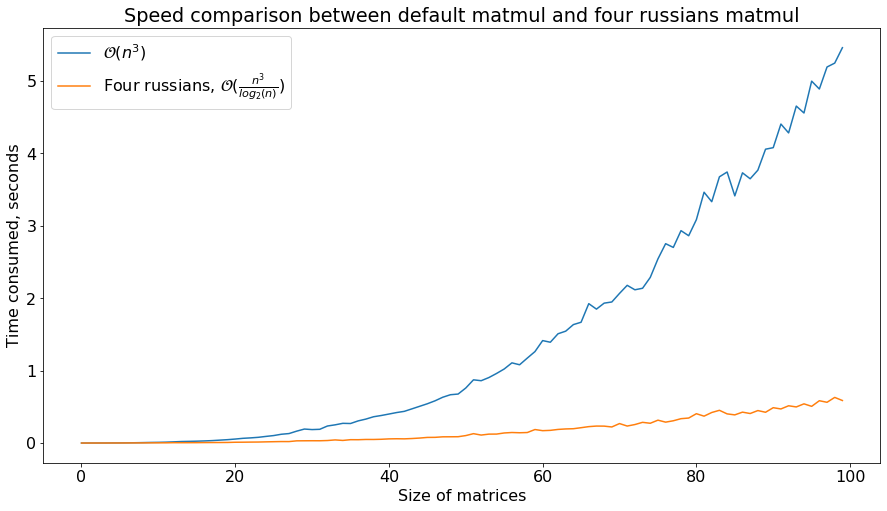

In [59]:
plt.figure(figsize=(15, 8))
plt.plot([value['matmul'] for value in results.values()], label=r'$\mathcal{O}(n^3)$')
plt.plot([value['matmul4r'] for value in results.values()], label=r'Four russians, $\mathcal{O}(\frac{n^3}{log_2(n)})$')
plt.title('Speed comparison between default matmul and four russians matmul')
plt.xlabel('Size of matrices')
plt.ylabel('Time consumed, seconds')
plt.legend()
plt.show()